In [12]:
import pandas as pd

df = pd.read_csv("../data/dataset.csv")
print(df.head())




   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [13]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 1


In [15]:
df = df.drop_duplicates()


In [16]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [17]:
print(df.describe())


             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.4

In [18]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


for col in categorical_cols:
    df[col] = df[col].astype(str)


df_encoded = pd.get_dummies(df, columns=categorical_cols)

print(f"Shape after encoding: {df_encoded.shape}")
print(df_encoded.head())

Shape after encoding: (302, 31)
   age  trestbps  chol  thalach  oldpeak  target  sex_0  sex_1   cp_0   cp_1  \
0   63       145   233      150      2.3       1  False   True  False  False   
1   37       130   250      187      3.5       1  False   True  False  False   
2   41       130   204      172      1.4       1   True  False  False   True   
3   56       120   236      178      0.8       1  False   True  False   True   
4   57       120   354      163      0.6       1   True  False   True  False   

   ...  slope_2  ca_0   ca_1   ca_2   ca_3   ca_4  thal_0  thal_1  thal_2  \
0  ...    False  True  False  False  False  False   False    True   False   
1  ...    False  True  False  False  False  False   False   False    True   
2  ...     True  True  False  False  False  False   False   False    True   
3  ...     True  True  False  False  False  False   False   False    True   
4  ...     True  True  False  False  False  False   False   False    True   

   thal_3  
0   False  


In [19]:
from sklearn.preprocessing import StandardScaler

num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

print(df_encoded.head())


        age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1  \
0  0.949794  0.764066 -0.261285  0.018826  1.084022       1  False   True   
1 -1.928548 -0.091401  0.067741  1.636979  2.118926       1  False   True   
2 -1.485726 -0.091401 -0.822564  0.980971  0.307844       1   True  False   
3  0.174856 -0.661712 -0.203222  1.243374 -0.209608       1  False   True   
4  0.285561 -0.661712  2.080602  0.587366 -0.382092       1   True  False   

    cp_0   cp_1  ...  slope_2  ca_0   ca_1   ca_2   ca_3   ca_4  thal_0  \
0  False  False  ...    False  True  False  False  False  False   False   
1  False  False  ...    False  True  False  False  False  False   False   
2  False   True  ...     True  True  False  False  False  False   False   
3  False   True  ...     True  True  False  False  False  False   False   
4   True  False  ...     True  True  False  False  False  False   False   

   thal_1  thal_2  thal_3  
0    True   False   False  
1   False    True   False  
2 

In [20]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (241, 30), Test shape: (61, 30)


In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler


In [23]:
model = LogisticRegression(max_iter=1000)
name = "Logistic Regression"

print(f"==========================================")
print(f"Training and evaluating: {name}")
print(f"==========================================")


Training and evaluating: Logistic Regression


In [24]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [25]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


In [26]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("-" * 30)


Accuracy: 0.8852
Precision: 0.9310
Recall: 0.8438
F1-Score: 0.8852
ROC AUC: 0.9397
------------------------------


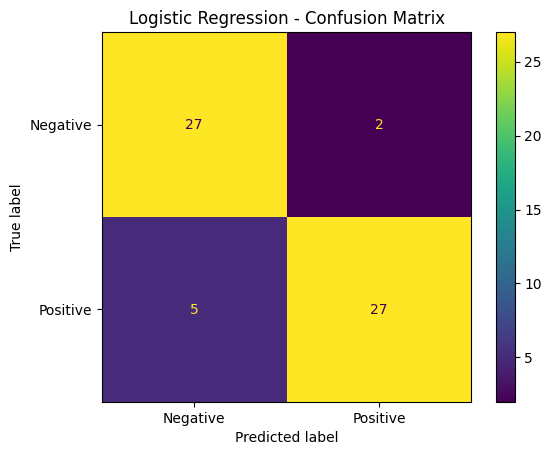

In [27]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot()
plt.title(f"{name} - Confusion Matrix")
plt.show()


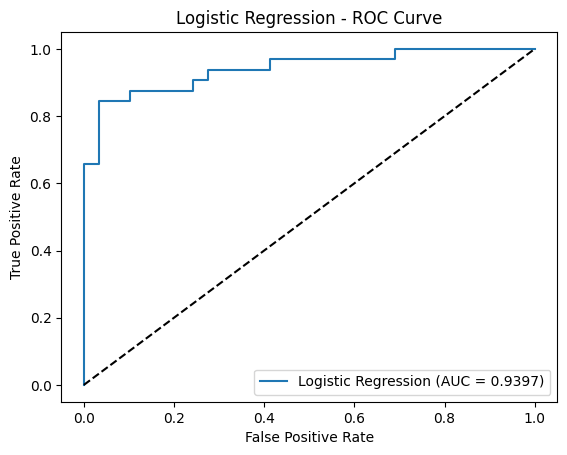

In [28]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"{name} - ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [29]:
import sklearn
print(sklearn.__version__)

1.7.1


In [31]:
import time
from sklearn.linear_model import LogisticRegression

In [32]:
X = df_encoded.drop("target", axis=1)
y = df_encoded["target"]


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
log_reg = LogisticRegression(max_iter=1000)

In [35]:
t0 = time.perf_counter()
log_reg.fit(X_train, y_train)
train_time = time.perf_counter() - t0

# Prediction time
t1 = time.perf_counter()
y_pred = log_reg.predict(X_test)
pred_time = time.perf_counter() - t1

print("✅ Logistic Regression Training time:", train_time, "seconds")
print("✅ Logistic Regression Prediction time:", pred_time, "seconds")


✅ Logistic Regression Training time: 0.048062199959531426 seconds
✅ Logistic Regression Prediction time: 0.005752699973527342 seconds


In [108]:
from sklearn.linear_model import LogisticRegression
import pickle

# Assuming you have your training data as X_train and y_train
# X_train, y_train = ... 

# Instantiate the Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Train the model
# The .fit() method learns the relationship between your features and the target variable
lr_model.fit(X_train, y_train)

# Save the trained model to a file
# The 'wb' mode stands for 'write binary'
with open('lr_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
model = DecisionTreeClassifier()
name = "Decision Tree"

print(f"==========================================")
print(f"Training and evaluating: {name}")
print(f"==========================================")

Training and evaluating: Decision Tree


In [37]:
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [38]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [39]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("-" * 30)



Accuracy: 0.8197
Precision: 0.8387
Recall: 0.8125
F1-Score: 0.8254
ROC AUC: 0.8200
------------------------------


In [40]:
from sklearn.tree import DecisionTreeClassifier
import time

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Training time
t0 = time.perf_counter()
dt_model.fit(X_train, y_train)
train_time = time.perf_counter() - t0

# Prediction time
t0 = time.perf_counter()
y_pred = dt_model.predict(X_test)
pred_time = time.perf_counter() - t0

print("Decision Tree Training Time:", train_time, "seconds")
print("Decision Tree Prediction Time:", pred_time, "seconds")


Decision Tree Training Time: 0.009634700021706522 seconds
Decision Tree Prediction Time: 0.0036236000014469028 seconds


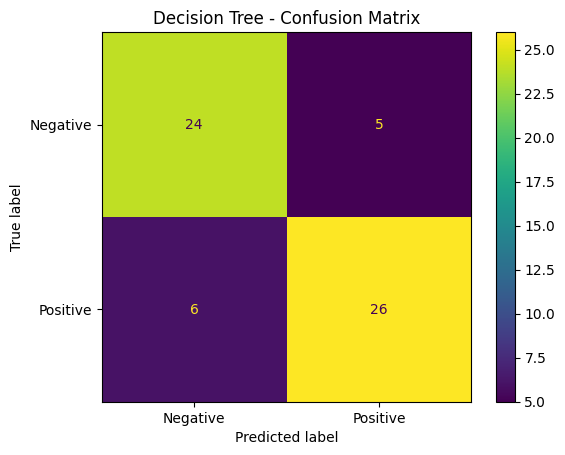

In [30]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot()
plt.title(f"{name} - Confusion Matrix")
plt.show()


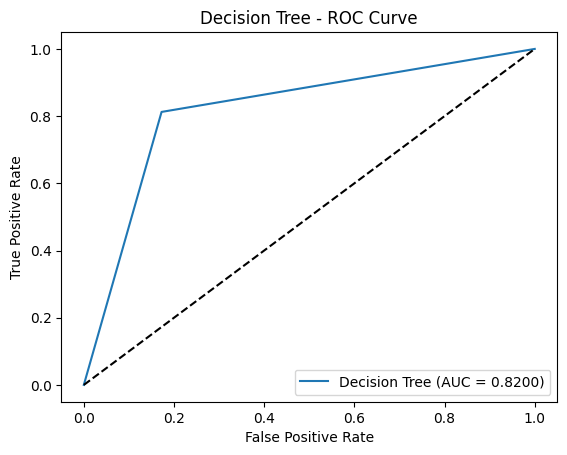

In [31]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"{name} - ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [107]:
from sklearn.tree import DecisionTreeClassifier
import pickle

# Assuming you have your training data as X_train and y_train
# X_train, y_train = ... 

# Instantiate the Decision Tree model
# You can adjust parameters like 'max_depth' to prevent overfitting
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
# The .fit() method learns the decision rules from your data
dt_model.fit(X_train, y_train)

# Save the trained model to a file
# The 'wb' mode stands for 'write binary'
with open('dt_model.pkl', 'wb') as f:
    pickle.dump(dt_model, f)

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

model = RandomForestClassifier()
name = "Random Forest"

print(f"==========================================")
print(f"Training and evaluating: {name}")
print(f"==========================================")




Training and evaluating: Random Forest


In [42]:
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [44]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("-" * 30)



Accuracy: 0.8689
Precision: 0.9000
Recall: 0.8438
F1-Score: 0.8710
ROC AUC: 0.9321
------------------------------


In [45]:
from sklearn.ensemble import RandomForestClassifier
import time

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training time
t0 = time.perf_counter()
rf_model.fit(X_train, y_train)
train_time = time.perf_counter() - t0

# Prediction time
t0 = time.perf_counter()
y_pred = rf_model.predict(X_test)
pred_time = time.perf_counter() - t0

print("Random Forest Training Time:", train_time, "seconds")
print("Random Forest Prediction Time:", pred_time, "seconds")


Random Forest Training Time: 0.144713599991519 seconds
Random Forest Prediction Time: 0.0038790000253356993 seconds


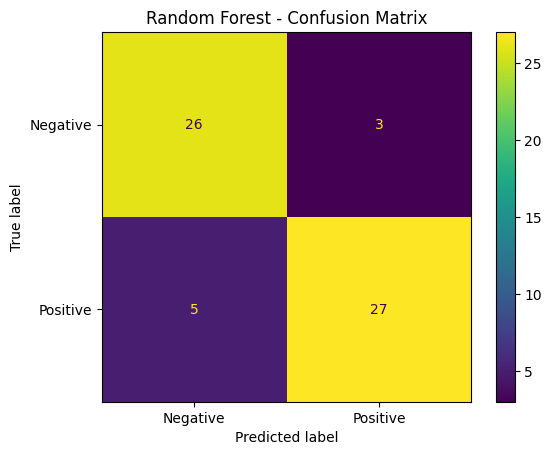

In [37]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot()
plt.title(f"{name} - Confusion Matrix")
plt.show()


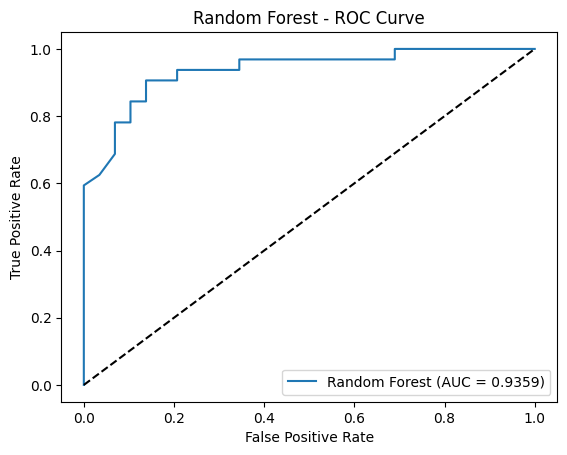

In [38]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"{name} - ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [106]:
from sklearn.ensemble import RandomForestClassifier
import pickle

# Assuming you have your training data as X_train and y_train
# X_train, y_train = ... 

# Instantiate the Random Forest model
# You can adjust parameters like n_estimators and max_depth
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
# The .fit() method learns the relationships from your data
rf_model.fit(X_train, y_train)

# Save the trained model to a file
# The 'wb' mode stands for 'write binary'
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
model = SVC(probability=True)
name = "SVM"

print(f"==========================================")
print(f"Training and evaluating: {name}")
print(f"==========================================")



Training and evaluating: SVM


In [47]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]



In [48]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("-" * 30)


Accuracy: 0.9180
Precision: 0.9655
Recall: 0.8750
F1-Score: 0.9180
ROC AUC: 0.9461
------------------------------


In [50]:
from sklearn.svm import SVC
import time

# Initialize the model
svm_model = SVC(kernel="rbf", probability=True, random_state=42)

# Training time
t0 = time.perf_counter()
svm_model.fit(X_train, y_train)
train_time = time.perf_counter() - t0

# Prediction time
t0 = time.perf_counter()
y_pred = svm_model.predict(X_test)
pred_time = time.perf_counter() - t0

print("SVM Training Time:", train_time, "seconds")
print("SVM Prediction Time:", pred_time, "seconds")


SVM Training Time: 0.023491400002967566 seconds
SVM Prediction Time: 0.005114900006446987 seconds


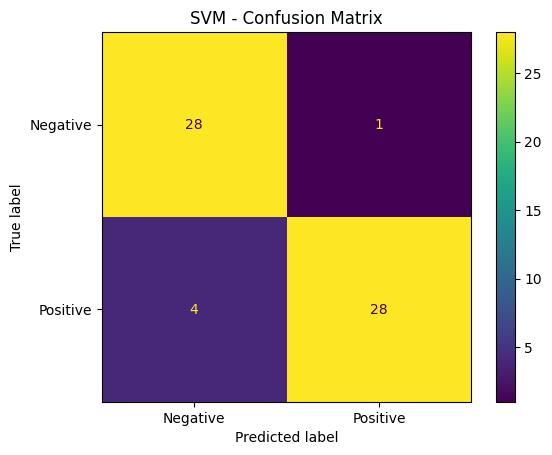

In [49]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot()
plt.title(f"{name} - Confusion Matrix")
plt.show()


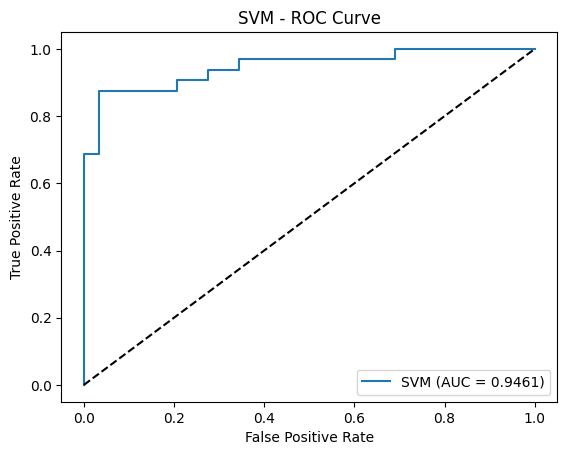

In [43]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"{name} - ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [105]:
from sklearn.svm import SVC
import pickle

# Assuming you have your training data as X_train and y_train
# X_train, y_train = ... 

# Instantiate the Support Vector Machine (SVM) model
# You can adjust parameters like 'kernel' and 'C' as needed
svm_model = SVC(kernel='rbf', random_state=42)

# Train the model
# The .fit() method learns the relationships from your data
svm_model.fit(X_train, y_train)

# Save the trained model to a file
# The 'wb' mode stands for 'write binary'
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler

In [52]:
model = GaussianNB()
name = "Gaussian Naive Bayes"

print(f"==========================================")
print(f"Training and evaluating: {name}")
print(f"==========================================")

Training and evaluating: Gaussian Naive Bayes


In [53]:
model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [54]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [55]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("-" * 30)



Accuracy: 0.7377
Precision: 0.9444
Recall: 0.5312
F1-Score: 0.6800
ROC AUC: 0.9095
------------------------------


In [56]:
from sklearn.naive_bayes import GaussianNB
import time

# Initialize the model
nb_model = GaussianNB()

# Training time
t0 = time.perf_counter()
nb_model.fit(X_train, y_train)
train_time = time.perf_counter() - t0

# Prediction time
t0 = time.perf_counter()
y_pred = nb_model.predict(X_test)
pred_time = time.perf_counter() - t0

print("Naive Bayes Training Time:", train_time, "seconds")
print("Naive Bayes Prediction Time:", pred_time, "seconds")


Naive Bayes Training Time: 0.00636940001277253 seconds
Naive Bayes Prediction Time: 0.0016667000018060207 seconds


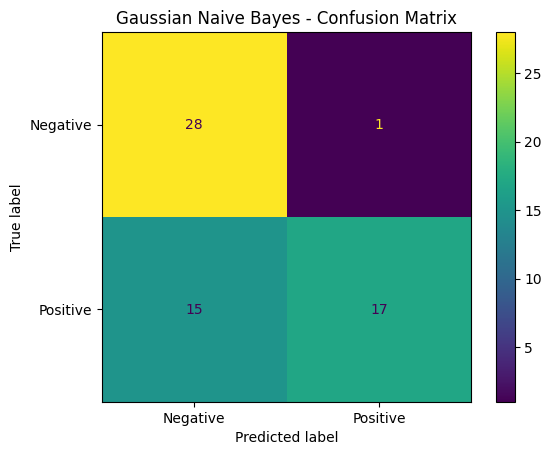

In [49]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot()
plt.title(f"{name} - Confusion Matrix")
plt.show()

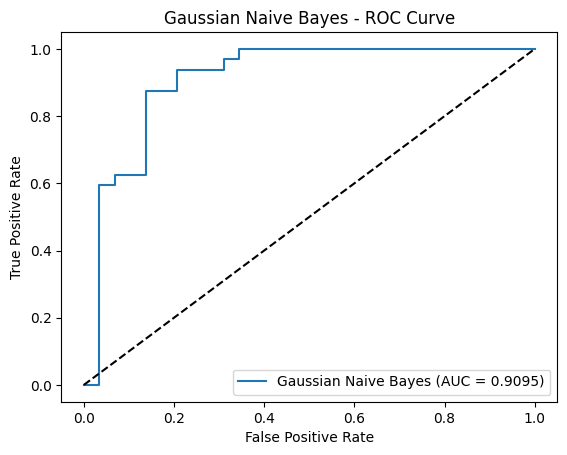

In [50]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"{name} - ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [104]:
from sklearn.naive_bayes import GaussianNB
import pickle

# Instantiate the Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Train the model (replace X_train, y_train with your actual data)
gnb_model.fit(X_train, y_train)

# Save the trained model to a file
with open('gnb_model.pkl', 'wb') as f:
    pickle.dump(gnb_model, f)

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import MinMaxScaler

In [58]:
model = BernoulliNB()
name = "Bernoulli Naive Bayes"

print(f"==========================================")
print(f"Training and evaluating: {name}")
print(f"==========================================")

Training and evaluating: Bernoulli Naive Bayes


In [59]:
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [60]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [61]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("-" * 30)

Accuracy: 0.8361
Precision: 0.8667
Recall: 0.8125
F1-Score: 0.8387
ROC AUC: 0.9300
------------------------------


In [62]:
from sklearn.naive_bayes import BernoulliNB
import time

# Initialize the model
bnb_model = BernoulliNB()

# Training time
t0 = time.perf_counter()
bnb_model.fit(X_train, y_train)
train_time = time.perf_counter() - t0

# Prediction time
t0 = time.perf_counter()
y_pred = bnb_model.predict(X_test)
pred_time = time.perf_counter() - t0

print("Bernoulli Naive Bayes Training Time:", train_time, "seconds")
print("Bernoulli Naive Bayes Prediction Time:", pred_time, "seconds")


Bernoulli Naive Bayes Training Time: 0.00806900003226474 seconds
Bernoulli Naive Bayes Prediction Time: 0.002668700006324798 seconds


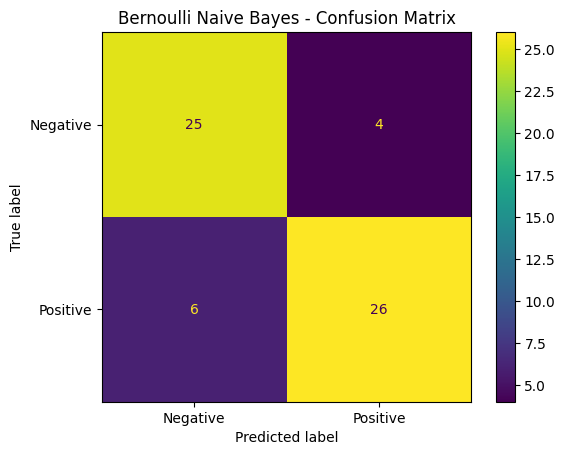

In [56]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot()
plt.title(f"{name} - Confusion Matrix")
plt.show()


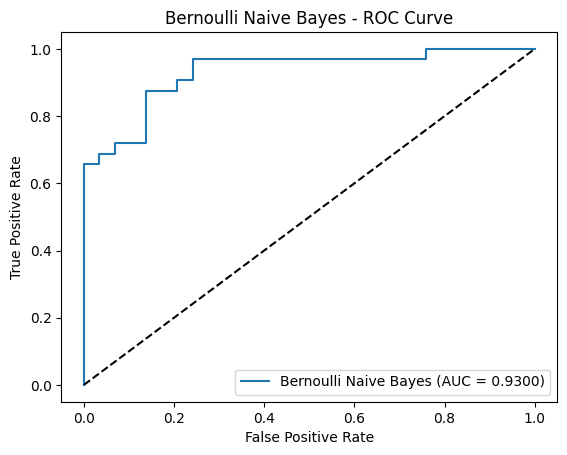

In [57]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"{name} - ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [102]:
from sklearn.naive_bayes import BernoulliNB
import time

# Initialize the model
bnb_model = BernoulliNB()

# Training time
t0 = time.perf_counter()
bnb_model.fit(X_train, y_train)
train_time = time.perf_counter() - t0

# Prediction time
t0 = time.perf_counter()
y_pred = bnb_model.predict(X_test)
pred_time = time.perf_counter() - t0

print("Bernoulli Naive Bayes Training Time:", train_time, "seconds")
print("Bernoulli Naive Bayes Prediction Time:", pred_time, "seconds")

Bernoulli Naive Bayes Training Time: 0.01355219999095425 seconds
Bernoulli Naive Bayes Prediction Time: 0.005464699992444366 seconds


In [103]:
from sklearn.naive_bayes import BernoulliNB
import pickle

# Instantiate the Bernoulli Naive Bayes model
bnb_model = BernoulliNB()

# Train the model (replace X_train, y_train with your actual data)
bnb_model.fit(X_train, y_train)

# Save the trained model to a file
with open('bnb_model.pkl', 'wb') as f:
    pickle.dump(bnb_model, f)

In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [88]:
model = KNeighborsClassifier()
name = "KNN"

print(f"==========================================")
print(f"Training and evaluating: {name}")
print(f"==========================================")


Training and evaluating: KNN


In [89]:
model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [90]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


In [91]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("-" * 30)


Accuracy: 0.9016
Precision: 0.9333
Recall: 0.8750
F1-Score: 0.9032
ROC AUC: 0.9359
------------------------------


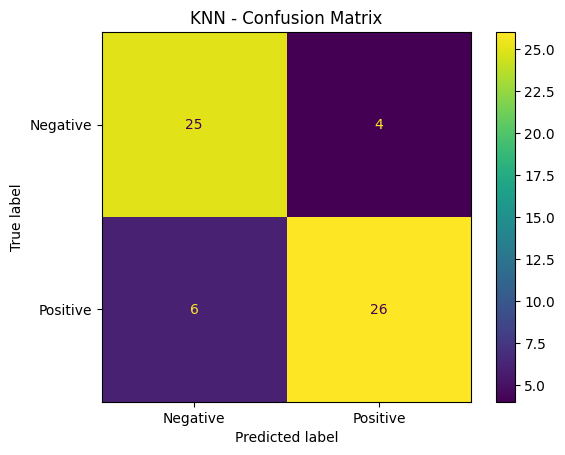

In [93]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot()
plt.title(f"{name} - Confusion Matrix")
plt.show()



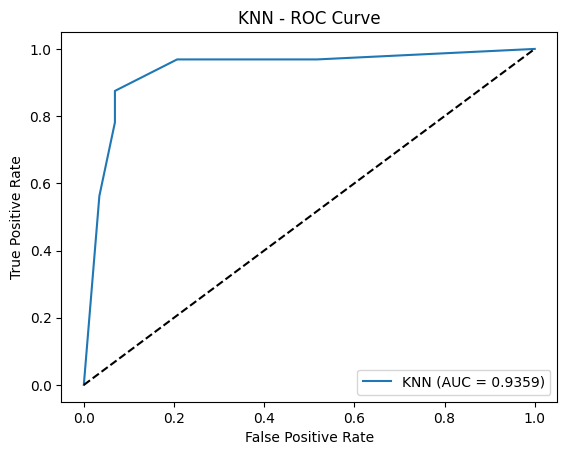

In [94]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"{name} - ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [96]:
from sklearn.neighbors import KNeighborsClassifier


In [97]:
knn_model = KNeighborsClassifier()

In [98]:
knn_model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [100]:
import pickle
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn_model, f)

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler




In [75]:
model = XGBClassifier(eval_metric='logloss')
name = "XGBoost"

print(f"==========================================")
print(f"Training and evaluating: {name}")
print(f"==========================================")



Training and evaluating: XGBoost


In [76]:

model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [77]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


In [78]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("-" * 30)


Accuracy: 0.8525
Precision: 0.8966
Recall: 0.8125
F1-Score: 0.8525
ROC AUC: 0.9149
------------------------------


In [82]:
from xgboost import XGBClassifier
import time

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Measure training time
start_train = time.perf_counter()
xgb_model.fit(X_train, y_train)
train_time = time.perf_counter() - start_train

# Measure prediction time
start_pred = time.perf_counter()
y_pred = xgb_model.predict(X_test)
pred_time = time.perf_counter() - start_pred

print(f"XGBoost Training Time: {train_time:.4f} seconds")
print(f"XGBoost Prediction Time: {pred_time:.4f} seconds")


XGBoost Training Time: 0.0873 seconds
XGBoost Prediction Time: 0.0048 seconds


C:\Users\darsh\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [19:59:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


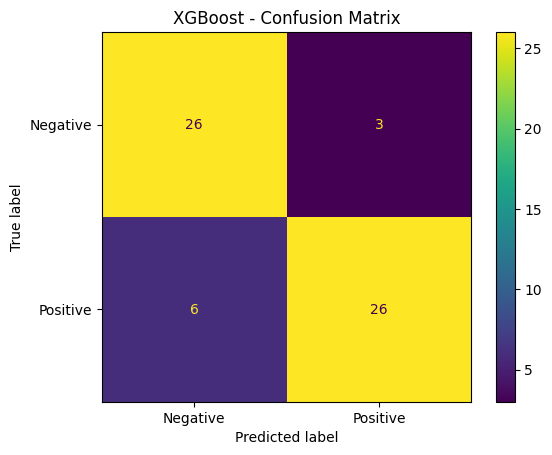

In [73]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot()
plt.title(f"{name} - Confusion Matrix")
plt.show()


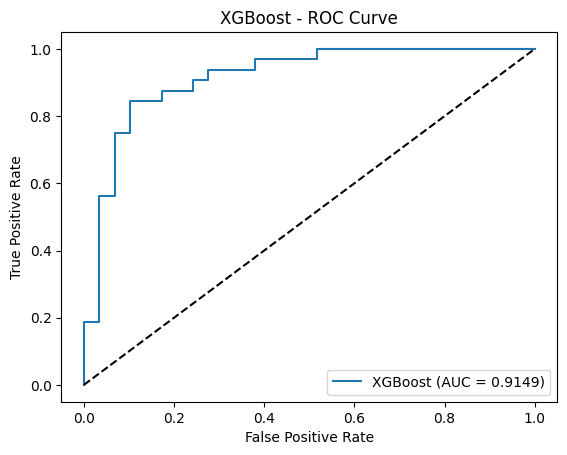

In [74]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"{name} - ROC Curve")
plt.legend(loc="lower right")
plt.show()








In [83]:
import pickle
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)



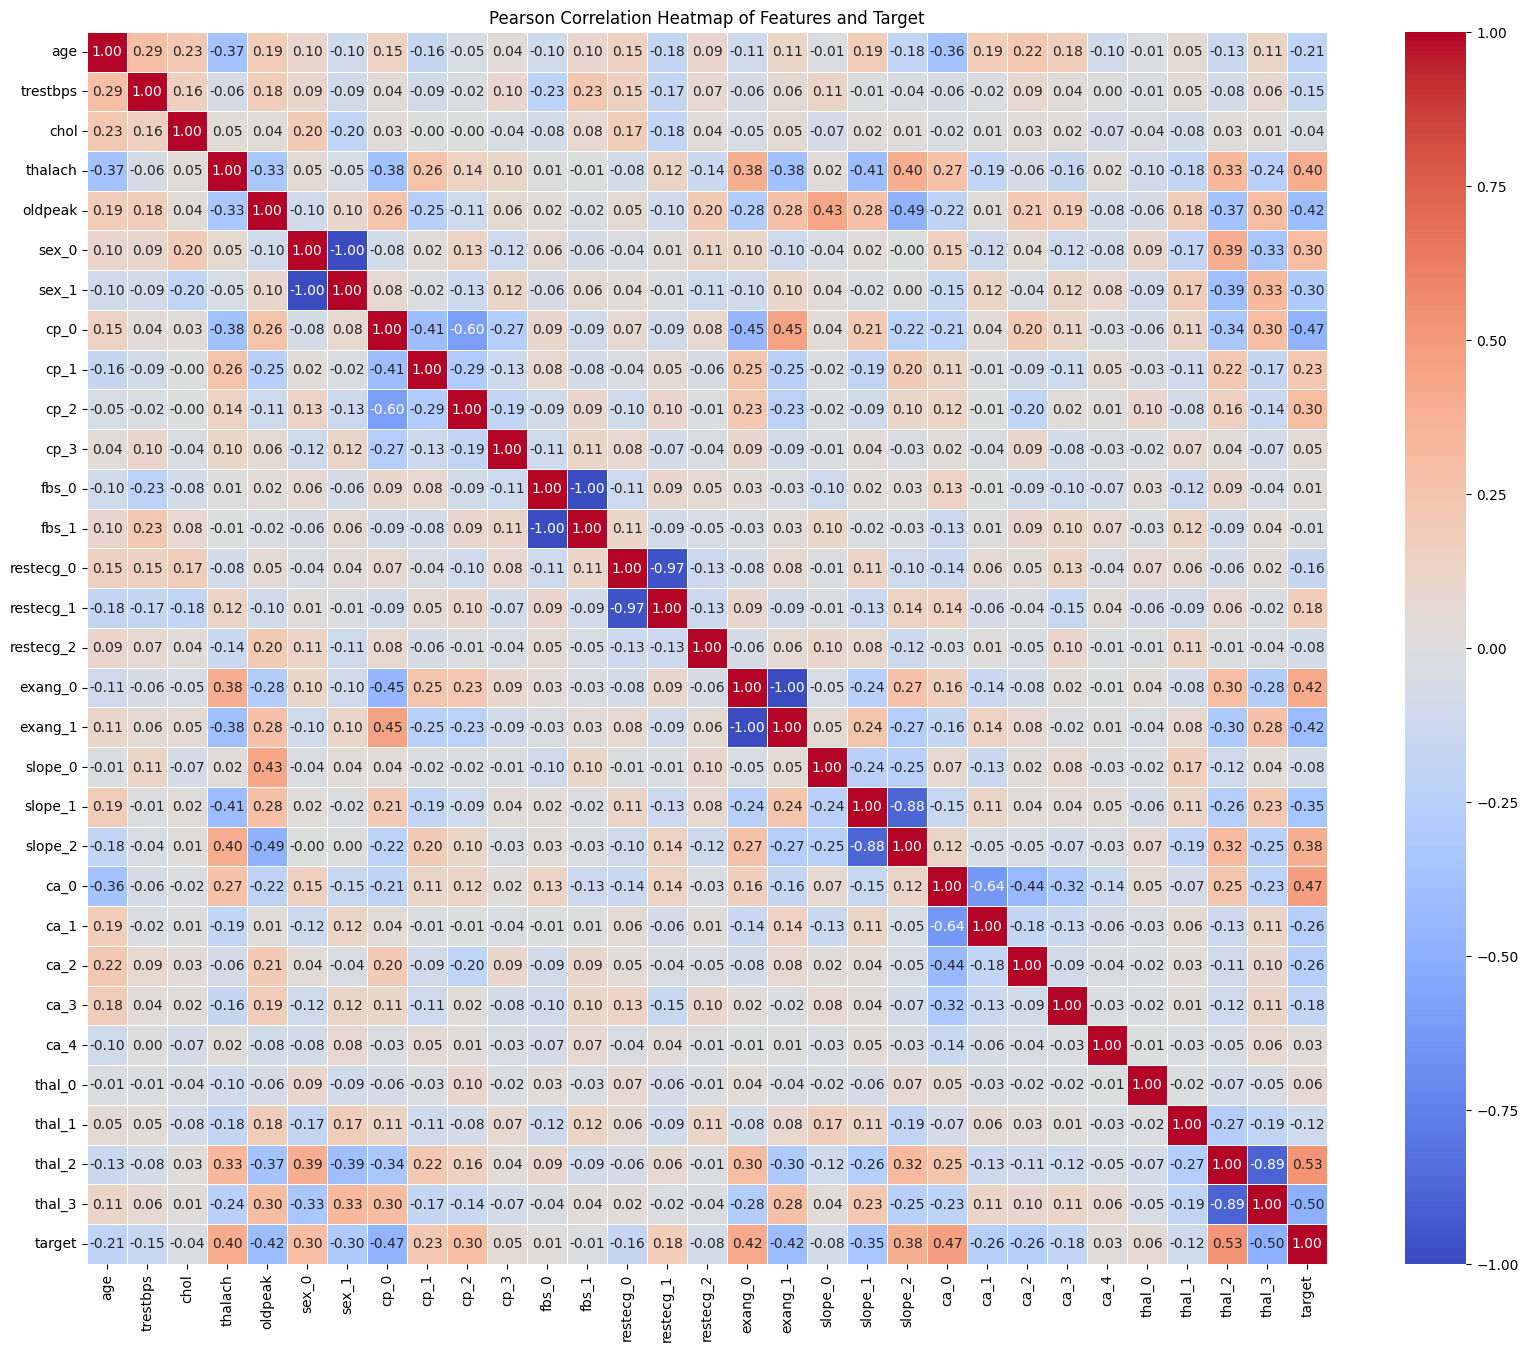

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# '
# if not isinstance(y_train, pd.Series):
#     y_train = pd.Series(y_train, name='Target')

# train_data_df = pd.concat([X_train, y_train], axis=1)

# correlation_matrix = train_data_df.corr(method='pearson')


# plt.figure(figsize=(20, 16)) 
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
# plt.title('Pearson Correlation Heatmap of Features and Target')
# plt.show()

In [109]:
import joblib

joblib.dump(model, "../models/log_reg.joblib")
joblib.dump(model, "../models/decision_tree.joblib")
joblib.dump(rf_model, "../models/random_forest.joblib")
joblib.dump(model, "../models/svc.joblib")
joblib.dump(model, "../models/gaussian_nb.joblib")
joblib.dump(model, "../models/bernoulli_nb.joblib")
joblib.dump(model, "../models/knn.joblib")
joblib.dump(xgb_model, "../models/xgboost.joblib")   


['../models/xgboost.joblib']